Walter Saldaña #19897

# Laboratorio 7: La Ciencia de Datos en Autopiloto

Importar librerías

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics

%pip install autogluon
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.core.metrics import make_scorer

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Carga de datos

In [2]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Análisis exploratorio

### Descripción del dataset
Contiene información de la frecuencia de varios síntomas, en pacientes, que suelen ser indicadores de diabetes, así como la información si los resultados de la prueba de diabetes fue positiva o negativa.

### Detalle de las variables
|Variable|Detalle|Clasificación|
|:--|:--|:--|
|Pregnancies|Número de veces que ha estado embarazada|Cuantitativa discreta|
|GlucosePlasma|Concentración de glucosa|Cuantitativa discreta|
|BloodPressure|Presión de sangre diastólica (mm Hg)|Cuantitativa discreta|
|Skin|Grosor del pliegue cutáneo del Triscep (mm)|Cuantitativa discreta|
|Insulin|Suero de insulina 2-Horas (mu U/ml)|Cuantitativa discreta|
|BMI|Indice de masa corporal (peso en Kg/(estatura en mts)2)|Cuantitativa continua|
|DiabetesPedigreeFunction|Función de pedigree de diabetes|Cuantitativa continua|
|Age:|Edad en años|Cuantitativa discreta|
|Outcome|Diabetes ó no diabetes (0 ó 1)|Cualitativa nominal|

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Resúmen estadístico del dataset

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Datos atípicos

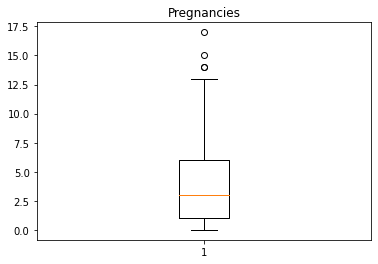

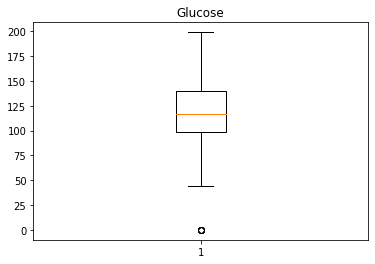

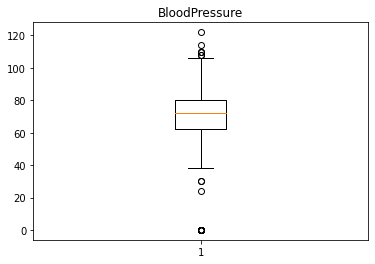

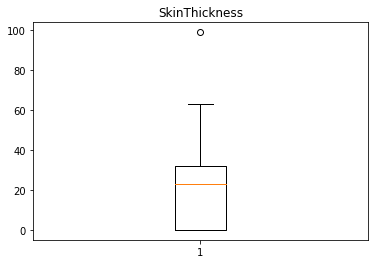

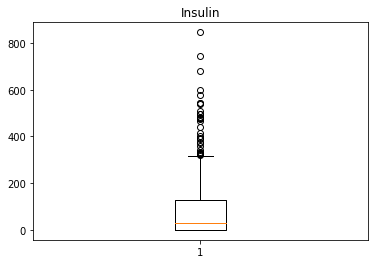

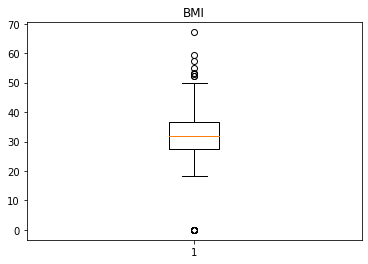

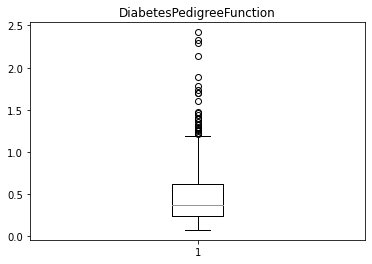

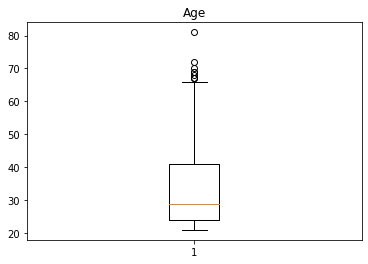

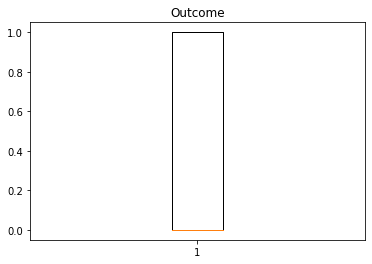

In [9]:
for column in df.columns:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

## Autogluon
### Predecir la columna "Outcome"

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [15]:
train_data = TabularDataset(train)
predictor = TabularPredictor(label="Outcome").fit(train_data)
test_data = TabularDataset(test)
predictions = predictor.predict(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20221007_222021/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221007_222021/"
AutoGluon Version:  0.5.2
Python Version:     3.9.5
Operating System:   Linux
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1838.24 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature

### Utilizar la calidad pre-determinada "best_quality" y la métrica "accuracy"

In [21]:
ag_accuracy_scorer = make_scorer(name='accuracy',
                                 score_func=sklearn.metrics.accuracy_score,
                                 optimum=1,
                                 greater_is_better=True)

### Evaluar el rendimiento de los modelos entrenados, a través de la graficación del tablero de líderes "leaderboard", e indicar el mejor de los modelos.

In [22]:
leaderboard = predictor.leaderboard(test_data)

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              LightGBM    0.837662   0.756098        0.001464       0.001276  0.207676                 0.001464                0.001276           0.207676            1       True          4
1            LightGBMXT    0.824675   0.796748        0.001204       0.001515  0.589997                 0.001204                0.001515           0.589997            1       True          3
2   WeightedEnsemble_L2    0.824675   0.796748        0.003434       0.001889  0.838247                 0.002230                0.000375           0.248250            2       True         14
3         LightGBMLarge    0.818182   0.747967        0.001309       0.058490  0.504241                 0.001309                0.058490           0.504241            1       True         13
4               XGBoost    0.818182   0.74796

El mejor modelo fue **LightGBM**, con un score test de 